## Линейная регрессия. Переход от аналитического решения к методу градиентного спуска.
Тема линейной регресии рассмотрена множество раз в различных источниках, но, как говорится, "нет такой избитой темы, которую нельзя ударить еще раз". В данной статье рассмотрим указанную тему, используя как математические выкладки, так и код python, пытаясь соблюсти баланс на грани простоты и должном уровне для понимания математических основ.

Линейная регрессия представляется из себя регриссионную модель зависимости одной (объясняемой, зависимой) переменной от другой или нескольких других переменных (фактров, регрессоров, независимых переменных) с линейной функцией зависимости. Рассмотрим модель линейной регрессии, при которой зависимая переменная зависит лишь от одного фактора.


Предположим даны начальные условия:

| x | 1 | 2 | 3 | 4 | 5 | 6  | 7  | 8 | 9 |
|:-:|:-:|:-:|:-:|:-:|:-:|:--:|:--:|:-:|:-:|
| y | 1 |1.3|2.1|2.4|2.9|3.45|3.65|4.1|4.4|
где y - зависимая переменная, x - фактор.

Тогда функция, описывающуя зависимость y от x будет иметь следующий вид:
$$f(x)=w_0+w_1*x$$
и задача сводится к нахождению весовых коэффициентов $w_0$ и $w_1$, таких что такая прямая максимально "хорошо" будет описывать исходные данные. Для этого зададим функцию ошибки, минимизация которой обеспечит подбор весов $w_0$ и $w_1$, используя метод наименьших квадратов:
$$MSE=\sum_{i=0}^{n}(y_i - f(x_i))^2$$
или подставив уравнение модели
$$MSE=\sum_{i=0}^{n}(y_i - w_0 - w_1*x_i)^2$$
Минимизируем функцию ошибки $MSE$ аналитическим способом, для этого найдем частные производные по $w_0$ и $w_1$
$$\int MSE(w_0, w_1)dw_0 = -2\sum_{i=0}^{n}(y_i - w_0 - w_1*x_i)$$
$$\int MSE(w_0, w_1)dw_1 = -2\sum_{i=0}^{n}((y_i - w_0 - w_1*x_i)*x_i)$$
И приравняв их $\int MSE(w_0, w_1)dw_0$ и $\int MSE(w_0, w_1)dw_1$ к нулю получим систему уравнений, решение которой обеспечит минимизацию функции потерь $MSE$. Решив систему через выражание одной переменной через другую получим:
$$w_0=\frac{\sum_{i=0}^{n}(y_i)}{n} - w_1*\frac{\sum_{i=0}^{n}(x_i)}{n}$$

$$w_1 = \frac{\frac{\sum_{i=0}^{n}(x_i*\sum_{i=0}^{n}(y_i))}{n}-\sum_{i=0}^{n}(y_i*x_i)}
{\frac{\sum_{i=0}^{n}(x_i*\sum_{i=0}^{n}(x_i))}{n}-\sum_{i=0}^{n}(x_i^2)}$$

Напишем код аналитического решения на python и подставим значения переменных $x_i$ и $y_i$ из условия задачи.

In [84]:
import numpy as np
#зададим начальные условия
x = np.array([1.1,2.2,3.1,4.2,5.1,6.2,7.1,8.2,9.1])
y = np.array([1,1.3,2.1,2.4,2.9,3.45,3.65,4.1,4.4])

n = len(x) 
w1 = (sum(x*sum(y))/n - sum(x*y))/(sum(x*sum(x))/n - sum(x**2))
w0 = sum(y)/n - w1*(sum(x)/n)
print('w0:',w0)
print('w1:',w1)

w0: 0.5697732321362419
w1: 0.43568122917438057


Отобразив полученный результат на графике имеем:

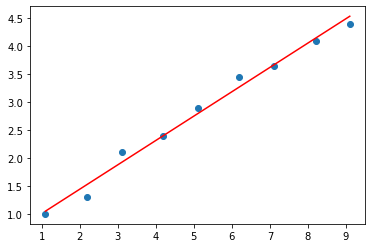

In [85]:
import matplotlib.pyplot as plt
plt.scatter(x=x, y=y)
plt.plot(x, w0 + w1*x,'-r')
plt.show()

В данном случае (случае одной независимой переменной) аналитическое решение выглядит вполне примлимым, однако увеличение числа независимых переменных ведет к росту количества уравнений в системе и соответственно к увелечению сложности получения аналитического решения, так например при добавлении только лишь одного дополнительного фактора формула нахождений веса $w_2$ выглядит следующим образом:

$$w_2 = 
\frac
    {\frac
        {n*\sum(y_i*x_{2i}) - \sum(x_{2i}*\sum(y_i))}
        {\sum(x_{2i}^2) - \sum(x_{2i}*\sum(x_{2i}))}
        +
     \frac
        {(n*\sum(y_i*x_{1i}) - \sum(x_{1i}*\sum(y_i))) * (\sum(x_{2i}*\sum(x_{1i})) - n*\sum(x_{1i}*x_{2i}))}
        {(n - \sum(x_{1i}*\sum(x_{1i}))) * (n*\sum(x_{2i}^2) - (n*\sum(x_{2i}*\sum(x_{2i}))))}
     }
     {1 - \frac
             {(\sum(x_{1i}*\sum(x{2i})) - n*\sum(x_{1i}*x_{2i})) * 
              (\sum(x_{2i}*\sum(x_{2i})) - n*\sum(x_{1i}*x_{2i}))
             }
             {(n*\sum(x_{1i}^2) - \sum(x_{1i}*\sum(x_{1i}))) * (n*\sum(x_{2i}^2) - \sum(x_{2i}*\sum(x_{2i})))}
     }$$
     
В такой ситуации необходимость перехода к численному способу нахождения весовых коэффициентов очевидна и мы переходим к рассмотрения такого метода - методу градиентного спуска.

Градиентный спуск - метод нахождения функции с помощью движения вдоль градиента. Т.е. способ решения можно описать следующим алгоритмом:
 1. Инициализации весов случайными значениями
 2. Вычисление градиента (в целях определения направления приращения)
 3. Делаем шаг в направлении градиента на некоторую величину

Повторяем шаги 2-3 до сходимости, которую определяем как небольшое изменение значения функции $MSE$.
Стоит отметить, что метод градиентного спуска гарантирует нахождение локального минимума, однако в нашем случае функция $MSE$ выпуклая и имеет только глобальный минимум. 

Посмотрим как это выглядит на примере. Инициализируем веса значениями, например $w_0 = 2$, а $w_1 = 3$, и подставив эти значения в выражения частных производных найденных ранее получим
$$\int MSE(w_0, w_1)dw_0 = -2\sum_{i=0}^{n}(y_i - 2 - 3*x_i)$$
$$\int MSE(w_0, w_1)dw_1 = -2\sum_{i=0}^{n}((y_i - 2 - 3*x_i)*x_i)$$
далее подставим начальные значения и вычислим значения частных производных, знак при значении и будет определять направление приращения (физический смысл производной). 

Реализуем предложенный алгоритм на python:

w0: 0.5695300000000377
w1: 0.4357300000002013


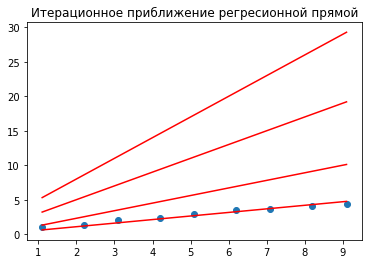

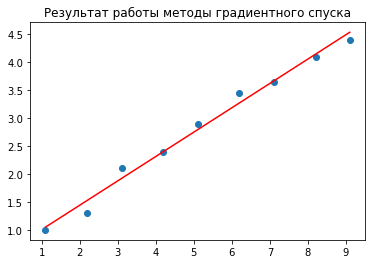

In [96]:
#метод градиентного спуска
#инициализируем значения весов
w0 = 2
w1 = 3

#определим функции вычисления градиета результатом работы которой будет значение: 
#1 - положительный знак, -1 - отрицательный
def mse_dw0_dw1(w0, w1):
    value_w0 = -2 * sum(y - w0 - w1*x)
    value_w1 = -2 * sum((y - w0 - w1*x)*x)
    #список направления по коэффициентам
    rezult = []
    if(abs(value_w0) == value_w0):
        rezult.append(1)
    else:
        rezult.append(-1)
    
    if(abs(value_w1) == value_w1):
        rezult.append(1)
    else:
        rezult.append(-1)
        
    return(rezult)

#определем функцию сходимости по оценке разницы между значениями функции MSE на некотором промежутке
def mean_error(mse_batch):
    error = []
    for i in range(len(mse_batch)-1):
        error.append(mse_batch[i] - mse_batch[i+1])
    return(sum(error))

#итерационно будем двигаться в сторону отрицательного знака (в сторону убывания)

mse = [] #значение функции MSE для определения сходимости
w0w1 = [] #значение весов для отрисовки процесса сходимости
w0w1.append([w0, w1])
delta_w = 0.01 #шаг приращения 
i = 0 #итерационная переменная

#в цикле определяем направление итерации в сторону минимума и выполняем приращение
while(True):    
    #реализация уменьшения длины шага для более точной сходимости
    if(i/100 == 1):
        delta_w = 0.001
        w0w1.append([w0, w1])
    elif(i/1000 == 1):
        delta_w = 0.0001
        w0w1.append([w0, w1])
    elif(i/10000 == 1):
        delta_w = 0.00001
        w0w1.append([w0, w1])
        
    #вычисление направления градиента и шаг в этом направлении
    dw0, dw1 = mse_dw0_dw1(w0, w1)
    w0 -= delta_w*dw0
    w1 -= delta_w*dw1
    
    #накопление значений ф-ции ошибки
    mse.append(sum((y-w0-w1*x)**2))
    
    #print('dw0=', dw0, 'dw1=', dw1,'i=', i,'mse=', mse[i])
    i += 1
    if(i > 20):
        if(mean_error(mse[i-20:i]) < 0.0000001):
            break

            
w0w1.append([w0, w1])
print('w0:',w0)
print('w1:',w1)

plt.scatter(x=x, y=y)
plt.plot(x, w0w1[0][0] + w0w1[0][1]*x,'-r')
plt.plot(x, w0w1[1][0] + w0w1[1][1]*x,'-r')
plt.plot(x, w0w1[2][0] + w0w1[2][1]*x,'-r')
plt.plot(x, w0w1[3][0] + w0w1[3][1]*x,'-r')
plt.title("Итерационное приближение регресионной прямой")
plt.show()
plt.scatter(x=x, y=y)
plt.title("Результат работы методы градиентного спуска")
plt.plot(x, w0w1[-1][0] + w0w1[-1][1]*x,'-r')
plt.show()

Мы получили довольно точные значения, улучшения могут быть направлены в сторону изменения функции длины шага, но главной задачей данной реализации была именно демонстрация принципа работы, а не точность расчета.
В данной реализации использовался полный градиент, поскольку факторов всего 2, на практике используется стохастический градиентный спуск (расчет одной частной производной и движение в ее направлении в случайном порядке) либо градиент расчитывается по нескольким значениям (рандомизированная выборка факторов), но принцип остается тот же - итерационное приближение к минимуму функции потерь MSE путем расчета дифференциалов и шагов в сторону уменьшения.

На этом пожалуй все, постарался в этой статье собрать полученные знания, понимаю, что можно было сделать лучше, но я новичок как на python, так и в data science в целом, но если хоть кому-то поможет разобраться в математических основах линейной регресии и методе градиентного спуска буду рад.

### P.S. Проверка правильности вывода $w_2$

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression

x1 = x
x2 = np.array([1.2,2.1,3.2,4.1,5.2,6.1,7.2,8.1,9.2])

xx = []
for i in range(len(x)):
    xx.append([x1[i], x2[i]])
    
model2 = LinearRegression().fit(xx, y)

print('w1:', model2.coef_[0])
print('w2:', model2.coef_[1])

a = (n*sum(y*x1) - sum(x1*sum(y))) / (n*sum(x1**2) - sum(x1*sum(x1)))
b = (sum(x1*sum(x2)) - n*sum(x1*x2)) / (n*sum(x1**2) - sum(x1*sum(x1)))
c = (n*sum(y*x2) - sum(x2*sum(y))) / (n*sum(x2**2) - (sum(x2*sum(x2))))
d = (sum(x2*sum(x1)) - n*sum(x1*x2)) / (n*sum(x2**2) - sum(x2*sum(x2)))
w2 = (c + a*b)/(1 - b*d)
print('w2 аналитический расчет:',w2)

w1: 0.2304166666666675
w2: 0.2054166666666658
w2 аналитический расчет: 0.20541666666550723
